# Hair Loss Prediction
## Tanner Wheeler
## A01770306
## CS 6850

### Imported Libraries

In [139]:
import copy
import numpy as np
import pandas as pd
from pandas import crosstab
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Reading the Data

Normal Data

In [140]:
data = pd.read_csv("PredictHairFall.csv")
data["Hair Loss"] = data["Hair Loss"].astype(bool)
classification_counts = data["Hair Loss"].value_counts()
data

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,False
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,False
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,False
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,False
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,True
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,False
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,True
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,True


In [141]:
classification_counts

Hair Loss
False    502
True     497
Name: count, dtype: int64

Binned Age Data

In [142]:
data_age = copy.deepcopy(data)

agelow = []
age2025 = []
age2530 = []
age3035 = []
age3540 = []
age4045 = []
agehigh = []
for index, row in data_age.iterrows():
    if row['Age'] <= 20:
        agelow.append('Yes')
    else:
        agelow.append('No')
    if row['Age'] > 20 and row['Age'] <= 25:
        age2025.append('Yes')
    else:
        age2025.append('No')
    if row['Age'] > 25 and row['Age'] <= 30:
        age2530.append('Yes')
    else:
        age2530.append('No')
    if row['Age'] > 30 and row['Age'] <= 35:
        age3035.append('Yes')
    else:
        age3035.append('No')
    if row['Age'] > 35 and row['Age'] <= 40:
        age3540.append('Yes')
    else:
        age3540.append('No')
    if row['Age'] > 40 and row['Age'] <= 45:
        age4045.append('Yes')
    else:
        age4045.append('No')
    if row['Age'] > 45:
        agehigh.append('Yes')
    else:
        agehigh.append('No')

data_age.insert(8, "Age<20", agelow, False)
data_age.insert(9, "Age20-25", age2025, False)
data_age.insert(10, "Age25-30", age2530, False)
data_age.insert(11, "Age30-35", age3035, False)
data_age.insert(12, "Age35-40", age3540, False)
data_age.insert(13, "Age40-45", age4045, False)
data_age.insert(14, "Age>45", agehigh, False)
data_age = data_age.drop(columns=['Age'])
data_age

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age<20,Age20-25,Age25-30,Age30-35,Age35-40,Age40-45,Age>45,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,Yes,No,No,No,No,No,No,Yes,Yes,No,No,False
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,No,No,No,No,No,Yes,No,Yes,Yes,No,No,False
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,No,No,Yes,No,No,No,No,Yes,Yes,No,Yes,False
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,No,No,No,No,No,No,Yes,Yes,Yes,No,No,False
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,No,No,Yes,No,No,No,No,No,Yes,Yes,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,No,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,True
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,No,No,No,No,No,No,Yes,No,No,No,Yes,False
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,True
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,No,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,True


Variation Data

In [143]:
#data_var = data[['Genetics', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress', 'Age', 'Hair Loss']]
#data_var = data[['Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress', 'Age', 'Hair Loss']]
data_var = data[['Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies ', 'Age', 'Hair Loss']]
data_var

,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Age,Hair Loss
0,No Data,No Data,Magnesium deficiency,19,False
1,Eczema,Antibiotics,Magnesium deficiency,43,False
2,Dermatosis,Antifungal Cream,Protein deficiency,26,False
3,Ringworm,Antibiotics,Biotin Deficiency,46,False
4,Psoriasis,Accutane,Iron deficiency,30,True
...,...,...,...,...,...
994,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,33,True
995,No Data,Accutane,Protein deficiency,47,False
996,Androgenetic Alopecia,Antidepressants,Protein deficiency,20,True
997,Dermatitis,Immunomodulators,Biotin Deficiency,32,True


One Hot Encoding Data

In [144]:
data_age = data_age.drop(columns=['Id'])
data_one_hot = data.drop(columns=['Id'])

In [145]:
def convert_to_one_hot(col):
    return pd.get_dummies(data_one_hot[col], prefix=col)

one_hot_data = []
list_of_columns = []
for c in data_one_hot.columns:
    d = convert_to_one_hot(c)
    for n in (d.columns):
        list_of_columns.append(n)
    one_hot_data.append(d)
one_hot_data = pd.concat(one_hot_data, ignore_index=False, axis=1)
one_hot_data.set_axis(list_of_columns, axis=1, copy=True)

,Genetics_No,Genetics_Yes,Hormonal Changes_No,Hormonal Changes_Yes,Medical Conditions_Alopecia Areata,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,...,Poor Hair Care Habits _No,Poor Hair Care Habits _Yes,Environmental Factors_No,Environmental Factors_Yes,Smoking_No,Smoking_Yes,Weight Loss _No,Weight Loss _Yes,Hair Loss_False,Hair Loss_True
0,False,True,True,False,False,False,False,False,False,True,...,False,True,False,True,True,False,True,False,True,False
1,True,False,True,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,False,True,False
2,True,False,True,False,False,False,False,True,False,False,...,False,True,False,True,True,False,False,True,True,False
3,False,True,False,True,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,True,False
4,True,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
995,False,True,False,True,False,False,False,False,False,True,...,True,False,True,False,True,False,False,True,True,False
996,True,False,False,True,False,True,False,False,False,False,...,False,True,True,False,False,True,False,True,False,True
997,True,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,True,False,True,False,True


In [146]:
for col in one_hot_data.columns:
    one_hot_data[col] = one_hot_data[col].astype(bool)
one_hot_data

,Genetics_No,Genetics_Yes,Hormonal Changes_No,Hormonal Changes_Yes,Medical Conditions_Alopecia Areata,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,...,Poor Hair Care Habits _No,Poor Hair Care Habits _Yes,Environmental Factors_No,Environmental Factors_Yes,Smoking_No,Smoking_Yes,Weight Loss _No,Weight Loss _Yes,Hair Loss_False,Hair Loss_True
0,False,True,True,False,False,False,False,False,False,True,...,False,True,False,True,True,False,True,False,True,False
1,True,False,True,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,False,True,False
2,True,False,True,False,False,False,False,True,False,False,...,False,True,False,True,True,False,False,True,True,False
3,False,True,False,True,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,True,False
4,True,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
995,False,True,False,True,False,False,False,False,False,True,...,True,False,True,False,True,False,False,True,True,False
996,True,False,False,True,False,True,False,False,False,False,...,False,True,True,False,False,True,False,True,False,True
997,True,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,True,False,True,False,True


#### Checking for any Null or NaN values in the Data Frame

In [147]:
data.isnull().any().any()

False

#### Checking for duplicate Ids

In [148]:
duplicates = data[data["Id"].duplicated(keep=False)]

In [149]:
duplicates

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
118,172639,Yes,Yes,Androgenetic Alopecia,Heart Medication,Iron deficiency,Moderate,29,Yes,No,Yes,No,True
237,157627,Yes,No,Dermatosis,Rogaine,Protein deficiency,Moderate,47,Yes,No,Yes,Yes,True
388,110171,Yes,No,Thyroid Problems,Antifungal Cream,Selenium deficiency,Low,25,Yes,No,Yes,Yes,False
408,110171,No,No,Psoriasis,Immunomodulators,Vitamin E deficiency,Low,41,Yes,No,No,Yes,False
600,157627,No,No,Thyroid Problems,Accutane,Protein deficiency,Moderate,44,Yes,Yes,Yes,Yes,False
669,186979,No,No,Seborrheic Dermatitis,Blood Pressure Medication,Vitamin E deficiency,Moderate,41,No,No,No,No,True
866,172639,Yes,Yes,No Data,Accutane,Vitamin A Deficiency,Low,47,Yes,No,No,Yes,False
956,186979,Yes,Yes,Seborrheic Dermatitis,Chemotherapy,No Data,Moderate,21,No,No,Yes,No,True


In [150]:
data = data.drop(columns=['Id'])

In [151]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Genetics,999,2,Yes,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Changes,999,2,Yes,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Conditions,999,11,No Data,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medications & Treatments,999,11,Rogaine,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nutritional Deficiencies,999,11,Zinc Deficiency,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stress,999,3,Moderate,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,999.0,NaN,NaN,NaN,34.188188,9.37798,18.0,26.0,34.0,42.0,50.0
Poor Hair Care Habits,999,2,No,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Environmental Factors,999,2,Yes,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking,999,2,Yes,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot the different values

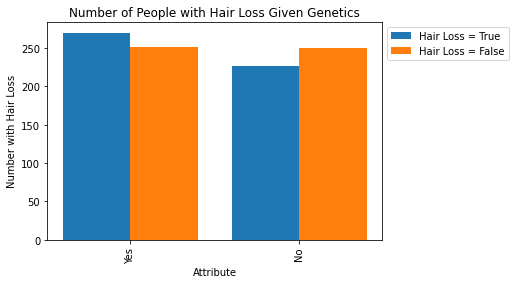

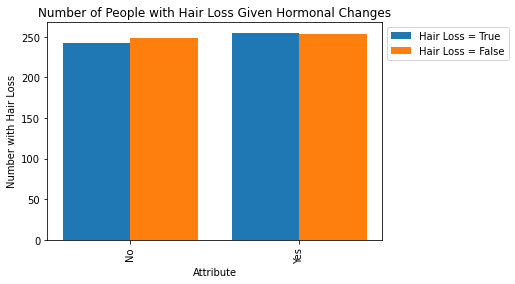

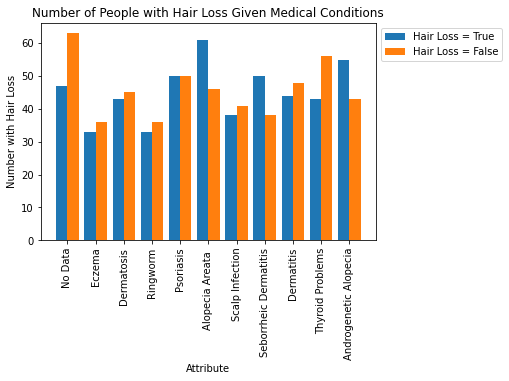

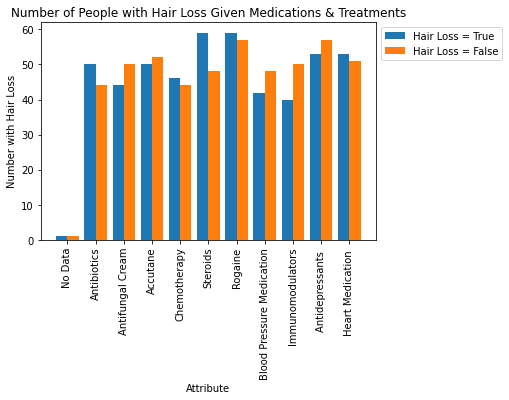

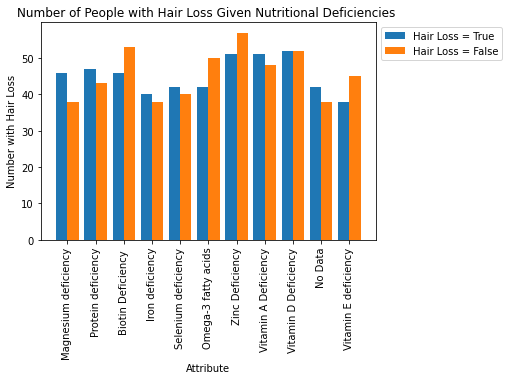

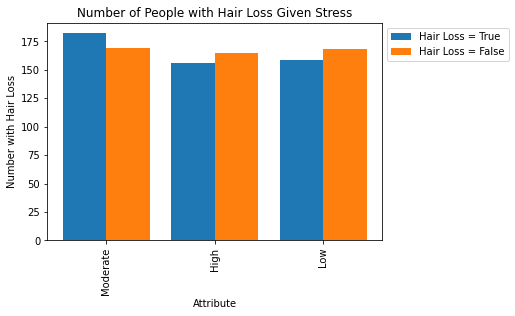

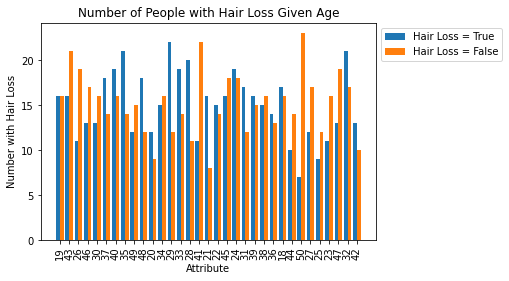

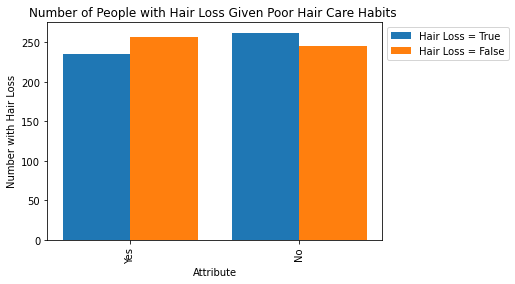

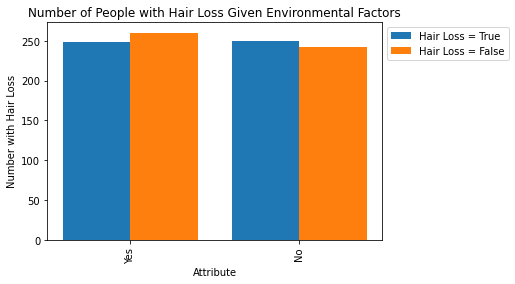

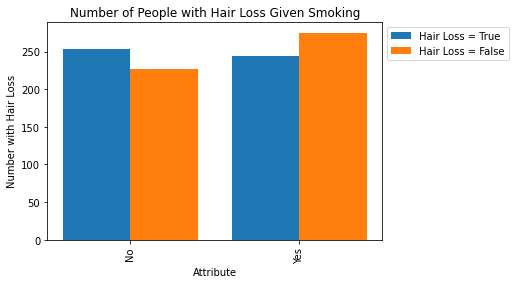

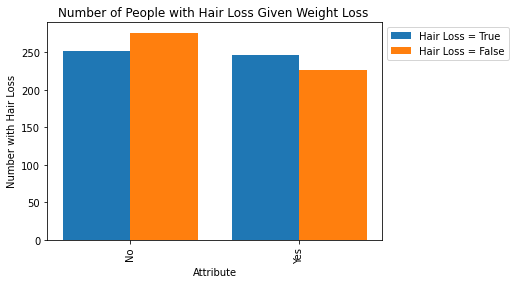

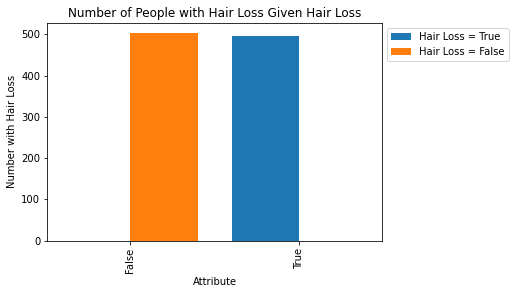

In [152]:
keys = [i for i in data.keys()]

for cat in keys:
    X = data[cat].unique()
    yes_list = []
    no_list = []
    for a in data[cat].unique():
        temp = data[data[cat] == a]
        yes_list.append(len(temp[temp['Hair Loss'] == True]))
        no_list.append(len(temp[temp['Hair Loss'] == False]))

    X_axis = np.arange(len(X))
    
    plt.bar(X_axis - 0.2, yes_list, 0.4, label='Hair Loss = True')
    plt.bar(X_axis + 0.2, no_list, 0.4, label='Hair Loss = False')
    
    plt.xticks(X_axis, X, rotation=90)
    plt.xlabel("Attribute")
    plt.ylabel("Number with Hair Loss")
    plt.title("Number of People with Hair Loss Given " + str(cat))
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

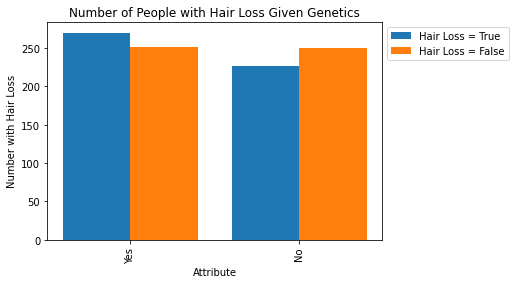

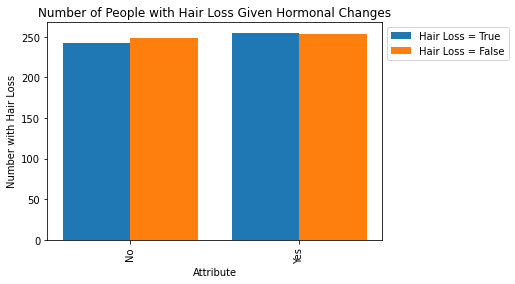

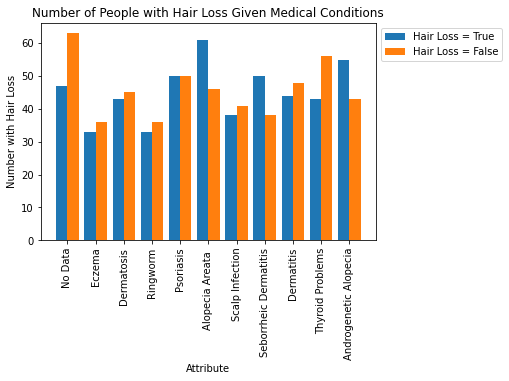

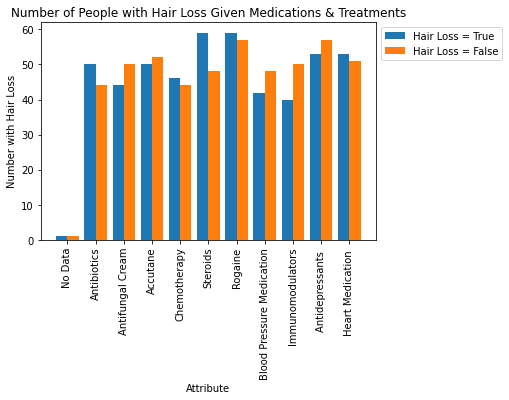

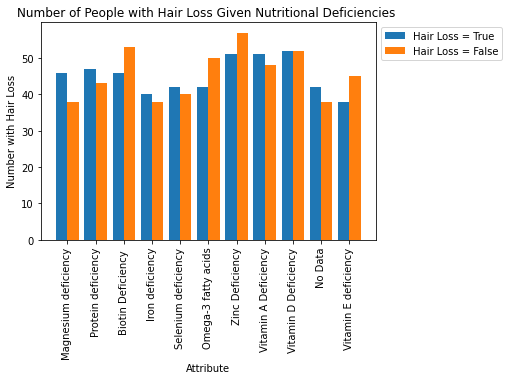

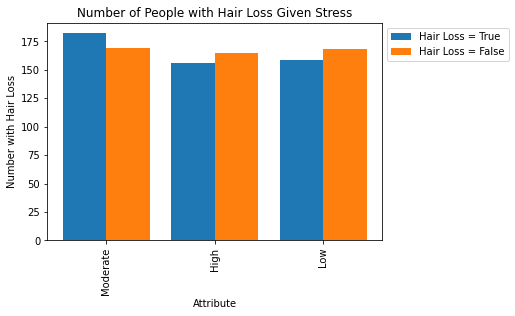

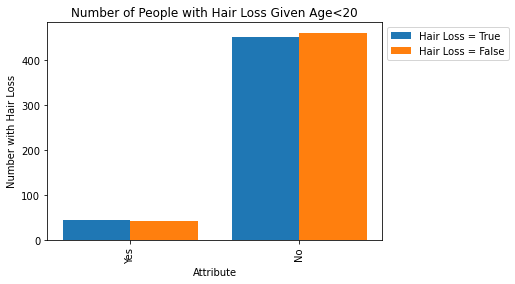

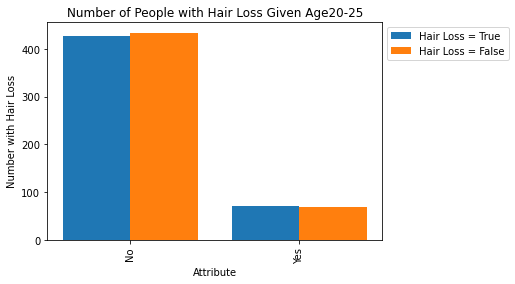

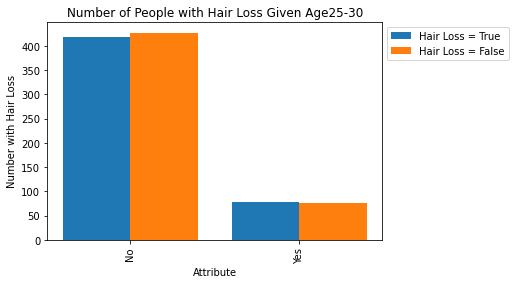

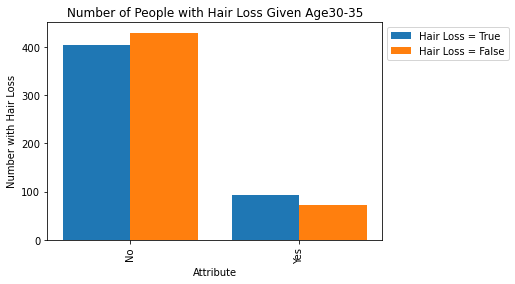

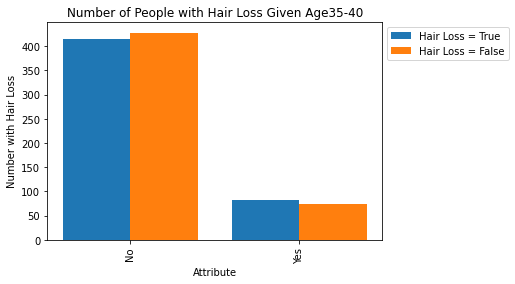

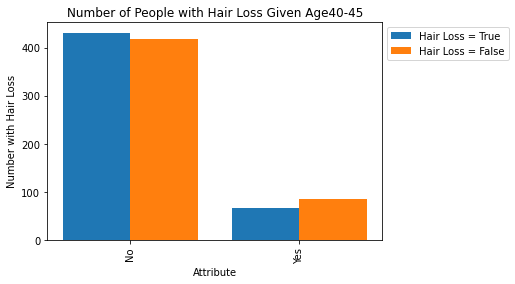

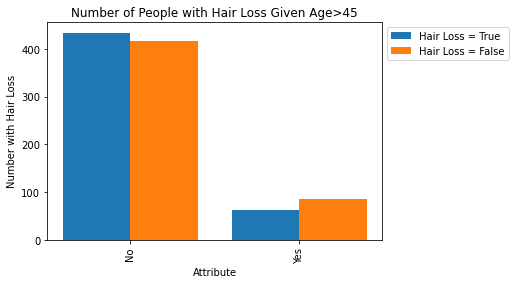

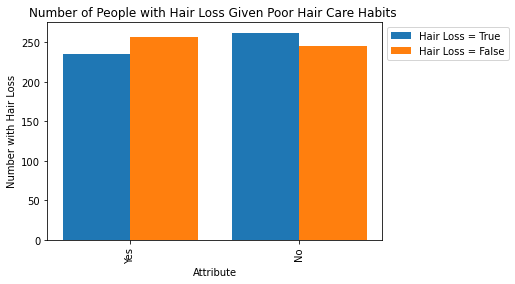

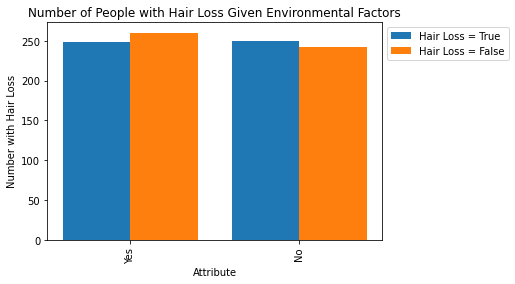

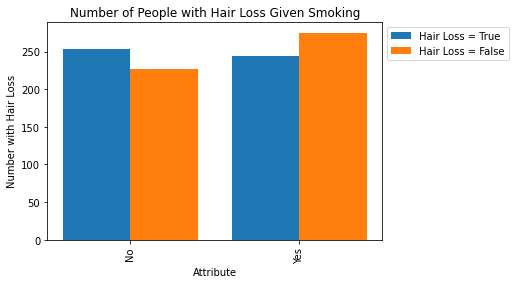

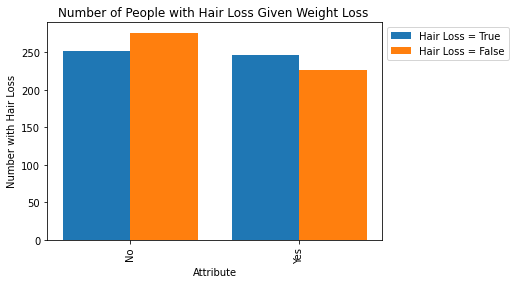

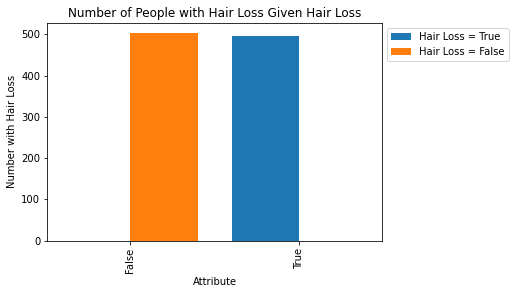

In [153]:
keys = [i for i in data_age.keys()]

for cat in keys:
    X = data_age[cat].unique()
    yes_list = []
    no_list = []
    for a in data_age[cat].unique():
        temp = data_age[data_age[cat] == a]
        yes_list.append(len(temp[temp['Hair Loss'] == True]))
        no_list.append(len(temp[temp['Hair Loss'] == False]))

    X_axis = np.arange(len(X))
    
    plt.bar(X_axis - 0.2, yes_list, 0.4, label='Hair Loss = True')
    plt.bar(X_axis + 0.2, no_list, 0.4, label='Hair Loss = False')
    
    plt.xticks(X_axis, X, rotation=90)
    plt.xlabel("Attribute")
    plt.ylabel("Number with Hair Loss")
    plt.title("Number of People with Hair Loss Given " + str(cat))
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

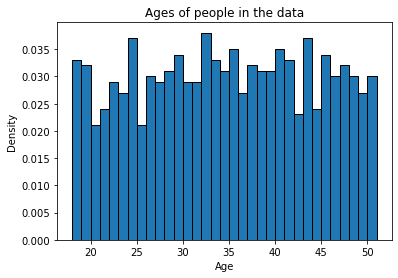

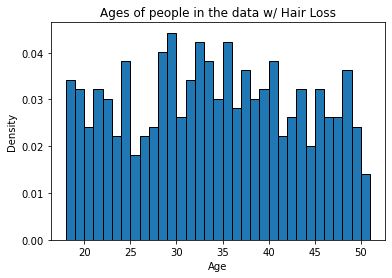

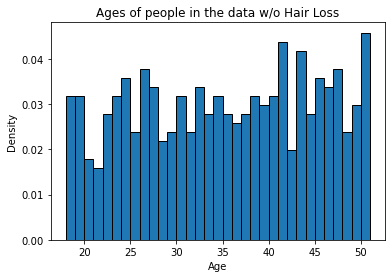

In [154]:
values = data['Age']
plt.hist(values, bins=range(18, 52), edgecolor="black", density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Ages of people in the data")
plt.show()

values = data[data['Hair Loss'] == True]['Age']
plt.hist(values, bins=range(18, 52), edgecolor="black", density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Ages of people in the data w/ Hair Loss")
plt.show()

values = data[data['Hair Loss'] == False]['Age']
plt.hist(values, bins=range(18, 52), edgecolor="black", density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Ages of people in the data w/o Hair Loss")
plt.show()

### Mutual Information

In [155]:
xs = [i for i in data.keys()]

#print(xs)

for x in range(len(xs)):
    for y in range(x,len(xs)):
        if xs[x] != xs[y]:
            data2 = data[[xs[x],xs[y]]]
            freq = crosstab(data2[xs[x]], data2[xs[y]])
            #print(freq)
            #print()
            total = freq.sum().sum()
            Pxy = round(freq/total,2)
            #print(Pxy)
            #print()
            Px = freq.sum(axis=1)/total
            Px = pd.DataFrame([Px for i in range(len(data2[xs[y]].unique()))], index=Pxy.columns).transpose()
            Py = freq.sum(axis=0)/total
            Py = pd.DataFrame([Py for i in range(len(data2[xs[x]].unique()))], index=Pxy.index).transpose()
            temp = Pxy/Px
            temp = temp/Py
            temp = Pxy*np.log(temp)/np.log(2)
            print("Mutual Information between " + xs[x] + " and " + xs[y] + ":", temp.sum().sum())

Mutual Information between Genetics and Hormonal Changes: -0.00021701119930679462
Mutual Information between Genetics and Medical Conditions: 0.0
Mutual Information between Genetics and Medications & Treatments: 0.0
Mutual Information between Genetics and Nutritional Deficiencies : 0.0
Mutual Information between Genetics and Stress: 0.0
Mutual Information between Genetics and Age: 0.0
Mutual Information between Genetics and Poor Hair Care Habits : 0.0016026095470909694
Mutual Information between Genetics and Environmental Factors: -0.00019977790747967641
Mutual Information between Genetics and Smoking: 0.0012718803231969167
Mutual Information between Genetics and Weight Loss : 0.02252731821249435
Mutual Information between Genetics and Hair Loss: 0.0
Mutual Information between Hormonal Changes and Medical Conditions: 0.0
Mutual Information between Hormonal Changes and Medications & Treatments: 0.0
Mutual Information between Hormonal Changes and Nutritional Deficiencies : 0.0
Mutual Inf

/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Mutual Information between Medical Conditions and Environmental Factors: 0.0
Mutual Information between Medical Conditions and Smoking: 0.0
Mutual Information between Medical Conditions and Weight Loss : 0.0
Mutual Information between Medical Conditions and Hair Loss: 0.0
Mutual Information between Medications & Treatments and Nutritional Deficiencies : 0.0
Mutual Information between Medications & Treatments and Stress: 0.0
Mutual Information between Medications & Treatments and Age: 0.0
Mutual Information between Medications & Treatments and Poor Hair Care Habits : 0.0
Mutual Information between Medications & Treatments and Environmental Factors: 0.0
Mutual Information between Medications & Treatments and Smoking: 0.0
Mutual Information between Medications & Treatments and Weight Loss : 0.0
Mutual Information between Medications & Treatments and Hair Loss: 0.0
Mutual Information between Nutritional Deficiencies  and Stress: 0.0
Mutual Information between Nutritional Deficiencies  and 

In [156]:
xs = [i for i in data_age.keys()]

#print(xs)

for x in range(len(xs)):
    for y in range(x,len(xs)):
        if xs[x] != xs[y]:
            data2_age = data_age[[xs[x],xs[y]]]
            freq = crosstab(data2_age[xs[x]], data2_age[xs[y]])
            #print(freq)
            #print()
            total = freq.sum().sum()
            Pxy = round(freq/total,2)
            #print(Pxy)
            #print()
            Px = freq.sum(axis=1)/total
            Px = pd.DataFrame([Px for i in range(len(data2_age[xs[y]].unique()))], index=Pxy.columns).transpose()
            Py = freq.sum(axis=0)/total
            Py = pd.DataFrame([Py for i in range(len(data2_age[xs[x]].unique()))], index=Pxy.index).transpose()
            temp = Pxy/Px
            temp = temp/Py
            temp = Pxy*np.log(temp)/np.log(2)
            print("Mutual Information between " + xs[x] + " and " + xs[y] + ":", temp.sum().sum())

Mutual Information between Genetics and Hormonal Changes: -0.00021701119930679462
Mutual Information between Genetics and Medical Conditions: 0.0
Mutual Information between Genetics and Medications & Treatments: 0.0
Mutual Information between Genetics and Nutritional Deficiencies : 0.0
Mutual Information between Genetics and Stress: 0.0
Mutual Information between Genetics and Age<20: 1.4660479095068772
Mutual Information between Genetics and Age20-25: 1.0161502692409856
Mutual Information between Genetics and Age25-30: 0.9130013596512292
Mutual Information between Genetics and Age30-35: 0.8146435480419181
Mutual Information between Genetics and Age35-40: 0.8765539710059137
Mutual Information between Genetics and Age40-45: 0.9401149339872445
Mutual Information between Genetics and Age>45: 0.9296089218166292
Mutual Information between Genetics and Poor Hair Care Habits : 0.0016026095470909694
Mutual Information between Genetics and Environmental Factors: -0.00019977790747967641
Mutual In

/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Mutual Information between Medications & Treatments and Age35-40: 0.0
Mutual Information between Medications & Treatments and Age40-45: 0.0
Mutual Information between Medications & Treatments and Age>45: 0.0
Mutual Information between Medications & Treatments and Poor Hair Care Habits : 0.0
Mutual Information between Medications & Treatments and Environmental Factors: 0.0
Mutual Information between Medications & Treatments and Smoking: 0.0
Mutual Information between Medications & Treatments and Weight Loss : 0.0
Mutual Information between Medications & Treatments and Hair Loss: 0.0
Mutual Information between Nutritional Deficiencies  and Stress: 0.0
Mutual Information between Nutritional Deficiencies  and Age<20: 0.0
Mutual Information between Nutritional Deficiencies  and Age20-25: 0.0
Mutual Information between Nutritional Deficiencies  and Age25-30: 0.0
Mutual Information between Nutritional Deficiencies  and Age30-35: 0.0
Mutual Information between Nutritional Deficiencies  and Age

/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:36

Mutual Information between Age25-30 and Age35-40: 0.01700522814236416
Mutual Information between Age25-30 and Age40-45: 0.03845278752080772
Mutual Information between Age25-30 and Age>45: 0.03844943035766002
Mutual Information between Age25-30 and Poor Hair Care Habits : -0.028645445878145846
Mutual Information between Age25-30 and Environmental Factors: 0.018017565703956625
Mutual Information between Age25-30 and Smoking: 0.041846057371191465
Mutual Information between Age25-30 and Weight Loss : -0.06345706420351833
Mutual Information between Age25-30 and Hair Loss: 0.0
Mutual Information between Age30-35 and Age35-40: 0.08563047049703332
Mutual Information between Age30-35 and Age40-45: 0.09393973505907793
Mutual Information between Age30-35 and Age>45: 0.094389073802426
Mutual Information between Age30-35 and Poor Hair Care Habits : -0.011186122020344153
Mutual Information between Age30-35 and Environmental Factors: 0.01700125858556855
Mutual Information between Age30-35 and Smoking

/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/tannerwheeler/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Mutual Information between Age>45 and Weight Loss : -0.03623458900974383
Mutual Information between Age>45 and Hair Loss: 0.0
Mutual Information between Poor Hair Care Habits  and Environmental Factors: 0.018558919274776632
Mutual Information between Poor Hair Care Habits  and Smoking: 0.016911293837731285
Mutual Information between Poor Hair Care Habits  and Weight Loss : 0.0032169911669100437
Mutual Information between Poor Hair Care Habits  and Hair Loss: 0.0
Mutual Information between Environmental Factors and Smoking: 0.0014005506053873344
Mutual Information between Environmental Factors and Weight Loss : 0.006385803432344565
Mutual Information between Environmental Factors and Hair Loss: 0.0
Mutual Information between Smoking and Weight Loss : 0.006527073082516495
Mutual Information between Smoking and Hair Loss: 0.0
Mutual Information between Weight Loss  and Hair Loss: 0.0


### Decision Trees

In [157]:
results = data['Hair Loss']
data_attr = data.drop(columns=['Hair Loss'])

In [158]:
results_age = data_age['Hair Loss']
data_age_attr = data_age.drop(columns=['Hair Loss'])

In [159]:
results_var = data_var['Hair Loss']
data_var_attr = data_var.drop(columns=['Hair Loss'])

Finding the best Tree Depth and Test Set size

Normal Data

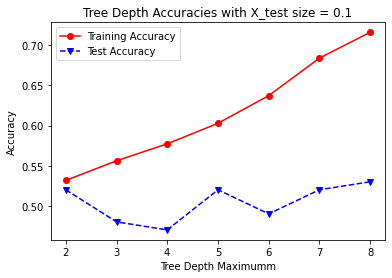

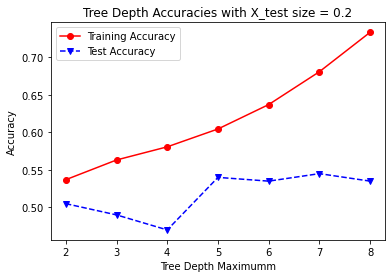

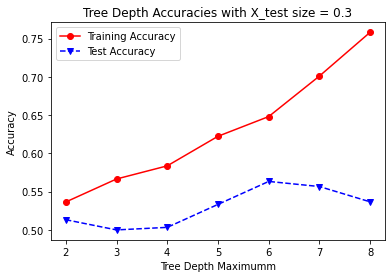

In [160]:
for i in range(1, 4):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_attr, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    maxdepths = [2,3,4,5,6,7,8]
    
    trainAcc = np.zeros(len(maxdepths))
    testAcc = np.zeros(len(maxdepths))
    index = 0
    
    for depth in maxdepths:
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Tree Depth Maximumm')
    plt.ylabel('Accuracy')
    plt.title('Tree Depth Accuracies with X_test size = ' + str(i/10))
    plt.show()

Binned Age Data

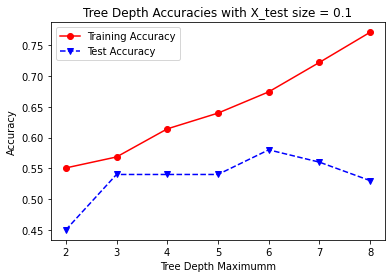

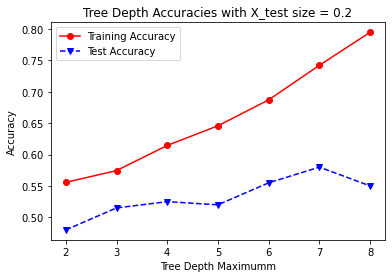

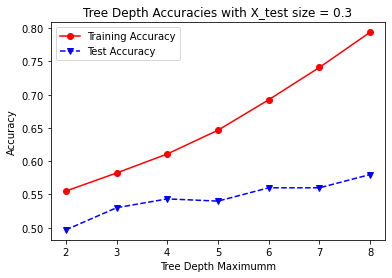

In [161]:
for i in range(1, 4):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_age_attr, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    maxdepths = [2,3,4,5,6,7,8]
    
    trainAcc = np.zeros(len(maxdepths))
    testAcc = np.zeros(len(maxdepths))
    index = 0
    
    for depth in maxdepths:
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Tree Depth Maximumm')
    plt.ylabel('Accuracy')
    plt.title('Tree Depth Accuracies with X_test size = ' + str(i/10))
    plt.show()

Variation Data

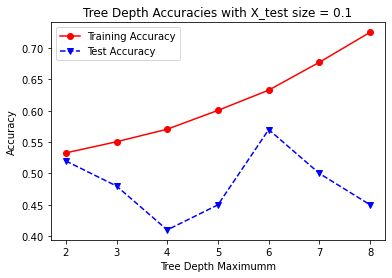

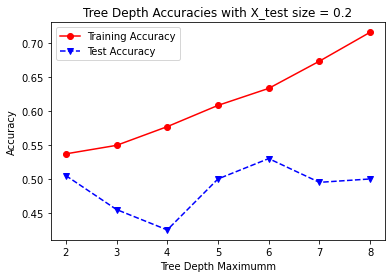

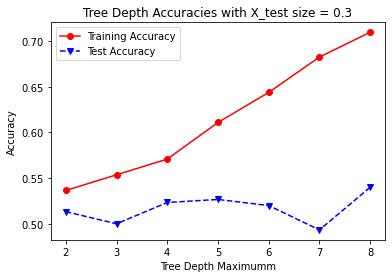

In [162]:
for i in range(1, 4):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_var_attr, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    maxdepths = [2,3,4,5,6,7,8]
    
    trainAcc = np.zeros(len(maxdepths))
    testAcc = np.zeros(len(maxdepths))
    index = 0
    
    for depth in maxdepths:
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Tree Depth Maximumm')
    plt.ylabel('Accuracy')
    plt.title('Tree Depth Accuracies with X_test size = ' + str(i/10))
    plt.show()

5-Fold Cross Validation with Decision Tree

Normal Data

In [163]:
df = data_attr
r = results

le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

clf = tree.DecisionTreeClassifier(max_depth=6)
scores = cross_val_score(clf, df, r, cv=5)

In [164]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.51 (+/- 0.06)


Binned Age Data

In [165]:
df = data_age_attr
r = results_age

le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

clf = tree.DecisionTreeClassifier(max_depth=6)
scores = cross_val_score(clf, df, r, cv=5)

In [166]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.51 (+/- 0.03)


Variation Data

In [167]:
df = data_var_attr
r = results_var

le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

clf = tree.DecisionTreeClassifier(max_depth=6)
scores = cross_val_score(clf, df, r, cv=5)

In [168]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.48 (+/- 0.07)


#### GridSearchCV

Normal Data

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(data_attr, results, test_size=1/10, random_state=1)

params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,100], 'min_samples_leaf': [5,10,20,50,100], 'criterion':['gini', 'entropy']}
dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 170 candidates, totalling 850 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                       25, 30, 40, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [170]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)

In [171]:
dt_best = grid_search.best_estimator_
Y_predTrain = dt_best.predict(X_train)
Y_predTest = dt_best.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

Train Acc: 0.5973303670745272
Test Acc: 0.51


Binned Age Data

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(data_age_attr, results, test_size=1/10, random_state=1)

params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,100], 'min_samples_leaf': [5,10,20,50,100], 'criterion':['gini', 'entropy']}
dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 170 candidates, totalling 850 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                       25, 30, 40, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [173]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)

In [174]:
dt_best = grid_search.best_estimator_
Y_predTrain = dt_best.predict(X_train)
Y_predTest = dt_best.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

Train Acc: 0.6407119021134594
Test Acc: 0.54


Variation Data

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(data_var_attr, results, test_size=1/10, random_state=1)

params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,100], 'min_samples_leaf': [5,10,20,50,100], 'criterion':['gini', 'entropy']}
dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 170 candidates, totalling 850 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                       25, 30, 40, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [176]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [177]:
dt_best = grid_search.best_estimator_
Y_predTrain = dt_best.predict(X_train)
Y_predTest = dt_best.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

# 0.51 w/o Genetics
# 0.41 w/o Genetics and Stress

Train Acc: 0.5672969966629589
Test Acc: 0.41


### Random Forest Classifier

Normal Data

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


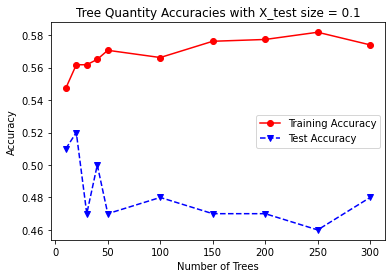

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


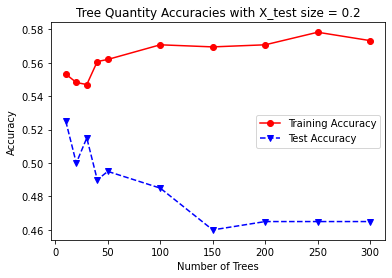

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


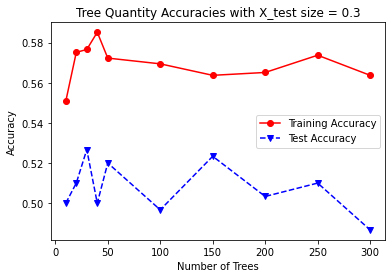

In [178]:
for i in range(1, 4):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_attr, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    number_of_estimators = [10,20,30,40,50,100,150,200,250,300]
    
    trainAcc = np.zeros(len(number_of_estimators))
    testAcc = np.zeros(len(number_of_estimators))
    index = 0
    
    for estimator in number_of_estimators:
        # Using a Random State for consistancy in initial testing
        clf = RandomForestClassifier(n_estimators=estimator, max_depth=1, random_state=0, oob_score=True)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(number_of_estimators, trainAcc, 'ro-', number_of_estimators, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title('Tree Quantity Accuracies with X_test size = ' + str(i/10))
    plt.show()

In [179]:
clf.oob_score_

0.4864091559370529

Binned Age Data

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


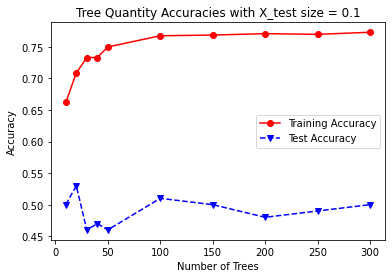

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


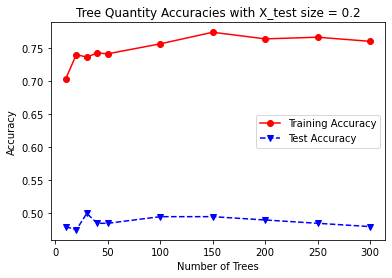

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


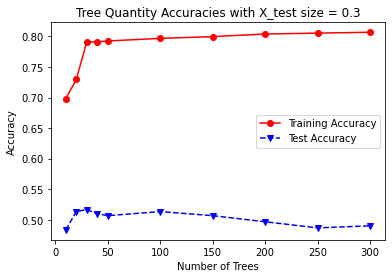

In [180]:
for i in range(1, 4):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_age_attr, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    number_of_estimators = [10,20,30,40,50,100,150,200,250,300]
    
    trainAcc = np.zeros(len(number_of_estimators))
    testAcc = np.zeros(len(number_of_estimators))
    index = 0

    #Tree depths of 5
    for estimator in number_of_estimators:
        # Using a Random State for consistancy in initial testing
        clf = RandomForestClassifier(n_estimators=estimator, max_depth=5, random_state=0, oob_score=True)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(number_of_estimators, trainAcc, 'ro-', number_of_estimators, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title('Tree Quantity Accuracies with X_test size = ' + str(i/10))
    plt.show()

In [181]:
clf.oob_score_

0.4978540772532189

Variation Data

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


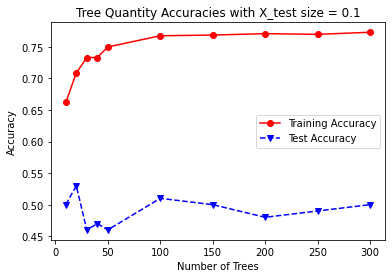

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


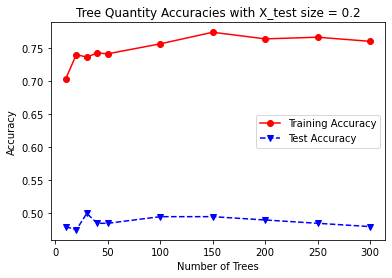

/home/tannerwheeler/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


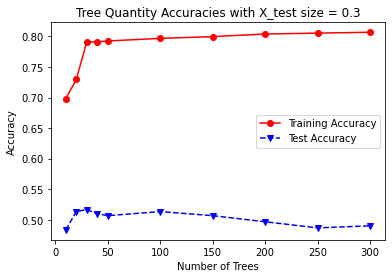

In [182]:
for i in range(1, 4):
    # Using a Random State for consistancy in initial testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_age_attr, results, test_size=i/10, random_state=1)
    
    le = preprocessing.LabelEncoder()
    for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass
    
    for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass
            
    number_of_estimators = [10,20,30,40,50,100,150,200,250,300]
    
    trainAcc = np.zeros(len(number_of_estimators))
    testAcc = np.zeros(len(number_of_estimators))
    index = 0

    #Tree depths of 5
    for estimator in number_of_estimators:
        # Using a Random State for consistancy in initial testing
        clf = RandomForestClassifier(n_estimators=estimator, max_depth=5, random_state=0, oob_score=True)
        clf = clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
    
    plt.plot(number_of_estimators, trainAcc, 'ro-', number_of_estimators, testAcc, 'bv--')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title('Tree Quantity Accuracies with X_test size = ' + str(i/10))
    plt.show()

In [183]:
clf.oob_score_

0.4978540772532189

5-Fold Cross Validation with Random Forests

Normal Data

In [184]:
df = data_attr
r = results

clf = RandomForestClassifier(max_depth=1, random_state=0)
scores = cross_val_score(clf, df, r, cv=5)

In [185]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.52 (+/- 0.04)


Binned Age Data

In [186]:
df = data_age_attr
r = results_age

clf = RandomForestClassifier(max_depth=1, random_state=0)
scores = cross_val_score(clf, df, r, cv=5)

In [187]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.52 (+/- 0.04)


Variation Data

In [188]:
df = data_var_attr
r = results_var

clf = RandomForestClassifier(max_depth=1, random_state=0)
scores = cross_val_score(clf, df, r, cv=5)

In [189]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.51 (+/- 0.05)


#### GridSearch CV

Normal Data

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(data_attr, results, test_size=1/10, random_state=1)

params = {'n_estimators': [10,20,30,40,50,100,150,200,250,300,400,500], 
          'max_depth': [1,2,3,4,5,6,7,8], 
          'min_samples_leaf': [5,10,20,50,100], 
          'criterion':['gini', 'entropy']
         }

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200,
                                          250, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [191]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=100, n_estimators=30)

In [192]:
dt_best = grid_search.best_estimator_
Y_predTrain = dt_best.predict(X_train)
Y_predTest = dt_best.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

Train Acc: 0.5695216907675195
Test Acc: 0.5


Binned Age Data

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(data_age_attr, results, test_size=1/10, random_state=1)

params = {'n_estimators': [10,20,30,40,50,100,150,200,250,300,400,500], 
          'max_depth': [1,2,3,4,5,6,7,8],
          'min_samples_leaf': [5,10,20,50,100], 
          'criterion':['gini', 'entropy']
         }

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200,
                                          250, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [194]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=100, n_estimators=30)

In [195]:
dt_best = grid_search.best_estimator_
Y_predTrain = dt_best.predict(X_train)
Y_predTest = dt_best.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

Train Acc: 0.5661846496106785
Test Acc: 0.46


Variation Data

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(data_var_attr, results, test_size=1/10, random_state=1)

params = {'n_estimators': [10,20,30,40,50,100,150,200,250,300,400,500], 
          'max_depth': [1,2,3,4,5,6,7,8],
          'min_samples_leaf': [5,10,20,50,100], 
          'criterion':['gini', 'entropy']
         }

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200,
                                          250, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [197]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=5, n_estimators=20)

In [198]:
dt_best = grid_search.best_estimator_
Y_predTrain = dt_best.predict(X_train)
Y_predTest = dt_best.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
# 0.45
# 0.52 w/o Genetics
# 0.44 w/o Genetics and Stress

Train Acc: 0.628476084538376
Test Acc: 0.44


### Naive Bayes Categorical Classifier

Normal Data

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(data_attr, results, test_size=1/10, random_state=1)

clf = CategoricalNB()
clf.fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

Train Acc: 0.60734149054505
Test Acc: 0.45


Binned Age Data

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(data_age_attr, results, test_size=1/10, random_state=1)

clf = CategoricalNB()
clf.fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

Train Acc: 0.5939933259176863
Test Acc: 0.47


Variation Data

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(data_var_attr, results, test_size=1/10, random_state=1)

clf = CategoricalNB()
clf.fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))

Train Acc: 0.5973303670745272
Test Acc: 0.42


### Logistical Regression Classifier

Normal Data

In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(data_attr, results, test_size=1/10, random_state=1)

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('LBFGS Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#----------------------

clf = LogisticRegression(random_state=0, solver='newton-cholesky').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('Newton-Cholesky Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#----------------------

clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('liblinear Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#-----------------------

clf = LogisticRegression(penalty='l1', random_state=0, solver='liblinear').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('liblinear Solver + L1 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

LBFGS Solver + L2 Penalty
Train Acc: 0.5583982202447163
Test Acc: 0.5

Newton-Cholesky Solver + L2 Penalty
Train Acc: 0.557285873192436
Test Acc: 0.5

liblinear Solver + L2 Penalty
Train Acc: 0.5639599555061179
Test Acc: 0.5

liblinear Solver + L1 Penalty
Train Acc: 0.5494994438264739
Test Acc: 0.49



Binned Age Data

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(data_age_attr, results, test_size=1/10, random_state=1)

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('LBFGS Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#---------------------_

clf = LogisticRegression(random_state=0, solver='newton-cholesky').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('Newton-Cholesky Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#----------------------

clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('liblinear Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#-----------------------

clf = LogisticRegression(penalty='l1', random_state=0, solver='liblinear').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('liblinear Solver + L1 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

LBFGS Solver + L2 Penalty
Train Acc: 0.5661846496106785
Test Acc: 0.48

Newton-Cholesky Solver + L2 Penalty
Train Acc: 0.5661846496106785
Test Acc: 0.48

liblinear Solver + L2 Penalty
Train Acc: 0.5661846496106785
Test Acc: 0.48

liblinear Solver + L1 Penalty
Train Acc: 0.5650723025583982
Test Acc: 0.48



Variation Data

In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(data_var_attr, results, test_size=1/10, random_state=1)

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('LBFGS Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#---------------------_

clf = LogisticRegression(random_state=0, solver='newton-cholesky').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('Newton-Cholesky Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#----------------------

clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('liblinear Solver + L2 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

#-----------------------

clf = LogisticRegression(penalty='l1', random_state=0, solver='liblinear').fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('liblinear Solver + L1 Penalty')
print("Train Acc:", accuracy_score(Y_train, Y_predTrain))
print("Test Acc:", accuracy_score(Y_test, Y_predTest))
print()

LBFGS Solver + L2 Penalty
Train Acc: 0.5372636262513905
Test Acc: 0.53

Newton-Cholesky Solver + L2 Penalty
Train Acc: 0.5372636262513905
Test Acc: 0.53

liblinear Solver + L2 Penalty
Train Acc: 0.5294771968854283
Test Acc: 0.51

liblinear Solver + L1 Penalty
Train Acc: 0.5272525027808677
Test Acc: 0.5



Hypertuning on the data. Random Forests also needs to have a spread of multiple trees as a variable that should be changed. Try to decrease the distance between the accuracy in training and accuracy in testing.

### Rules Analysis

In [205]:
frq_items = apriori(one_hot_data, min_support=0.2, max_len=None, use_colnames=True)

In [206]:
frq_items.sort_values("support",ascending=False)

,support,itemsets
13,0.527528,(Weight Loss _No)
1,0.522523,(Genetics_Yes)
12,0.519520,(Smoking_Yes)
3,0.509510,(Hormonal Changes_Yes)
10,0.508509,(Environmental Factors_Yes)
...,...,...
26,0.227227,"(Genetics_No, Weight Loss _Yes)"
70,0.226226,"(Poor Hair Care Habits _Yes, Environmental Fac..."
100,0.226226,"(Hair Loss_False, Weight Loss _Yes)"
23,0.221221,"(Genetics_No, Smoking_No)"


In [207]:
rules = association_rules(frq_items, metric="confidence", min_threshold=0.5)
rules = rules.sort_values('confidence', ascending=False)
rules[rules['consequents'] == {'Hair Loss_True'}]
#for rule in rules[rules['consequents'] == {'Hair Loss_True'}]['antecedents']:
#    print(rule)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
76,(Smoking_No),(Hair Loss_True),0.480480,0.497497,0.253253,0.527083,1.059469,0.014215,1.062560,0.108045
85,(Weight Loss _Yes),(Hair Loss_True),0.472472,0.497497,0.246246,0.521186,1.047616,0.011192,1.049474,0.086160
23,(Genetics_Yes),(Hair Loss_True),0.522523,0.497497,0.270270,0.517241,1.039686,0.010317,1.040898,0.079944
54,(Poor Hair Care Habits _No),(Hair Loss_True),0.507508,0.497497,0.262262,0.516765,1.038729,0.009779,1.039873,0.075708
65,(Environmental Factors_No),(Hair Loss_True),0.491491,0.497497,0.249249,0.507128,1.019359,0.004733,1.019540,0.037346
43,(Hormonal Changes_Yes),(Hair Loss_True),0.509510,0.497497,0.255255,0.500982,1.007005,0.001776,1.006983,0.014182
